In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("loan_prediction.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.drop(["Loan_ID"],axis=1,inplace=True)

In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [17]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [21]:
df["Gender"].fillna("Unknown",inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_14180\4079419841.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna("Unknown",inplace=True)


In [23]:
df["Gender"].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [25]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [27]:
df["Married"].fillna("NA",inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_14180\1180604513.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Married"].fillna("NA",inplace=True)


In [29]:
df["Married"].unique()

array(['No', 'Yes', 'NA'], dtype=object)

In [31]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [33]:
df["Dependents"]=df["Dependents"].replace("3+","3")

In [35]:
df["Dependents"].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [37]:
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_14180\3195475497.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)


In [39]:
df["Dependents"].unique()

array(['0', '1', '2', '3'], dtype=object)

In [41]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [43]:
df["Self_Employed"].fillna("NA",inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_14180\1448306217.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Self_Employed"].fillna("NA",inplace=True)


In [45]:
df["Self_Employed"].unique()

array(['No', 'Yes', 'NA'], dtype=object)

In [47]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [49]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_14180\1697573233.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)


In [51]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [53]:
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_14180\602136321.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)


<Axes: ylabel='LoanAmount'>

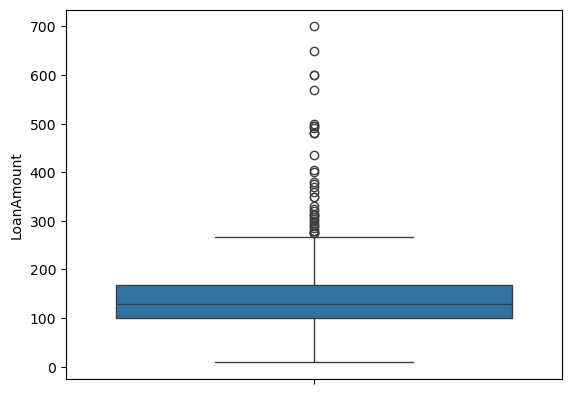

In [55]:
sns.boxplot(df["LoanAmount"])

In [57]:
df["LoanAmount"].median()

128.0

In [59]:
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_14180\3353207978.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)


In [61]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [63]:
Numerical=df.select_dtypes(exclude="object")
Categorical=df.select_dtypes(include="object")

In [65]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le=LabelEncoder()

In [69]:
for i in Categorical:
    df[i]=le.fit_transform(df[i])

In [71]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,1,2,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,1,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,1,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,1,1,0,0,1,6000,0.0,141.0,360.0,1.0,2,1


In [73]:
df.shape

(614, 12)

In [75]:
from scipy.stats import zscore

In [77]:
z=np.abs(zscore(df))

In [79]:
df1=df[(z<3).all(axis=1)]

In [81]:
df1.shape

(574, 12)

In [83]:
df=df1.copy()

In [85]:
df.skew()

Gender              -0.992509
Married             -0.621783
Dependents           1.044319
Education            1.298537
Self_Employed        0.516499
ApplicantIncome      2.159707
CoapplicantIncome    1.344041
LoanAmount           1.153126
Loan_Amount_Term    -2.163753
Credit_History      -1.967452
Property_Area       -0.052614
Loan_Status         -0.814453
dtype: float64

In [87]:
skew=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer(method="yeo-johnson")

In [89]:
df[skew]=PT.fit_transform(df[skew].values)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,1,0.685140,-1.125108,0.003283,360.0,1.0,2,1
1,1,2,1,0,1,0.238197,0.740024,0.003283,360.0,1.0,0,0
2,1,2,0,0,2,-0.523797,-1.125108,-1.433052,360.0,1.0,2,1
3,1,2,0,1,1,-0.788602,0.892550,-0.150712,360.0,1.0,2,1
4,1,1,0,0,1,0.732199,-1.125108,0.240222,360.0,1.0,2,1


In [91]:
df.skew()

Gender              -0.992509
Married             -0.621783
Dependents           1.044319
Education            1.298537
Self_Employed        0.516499
ApplicantIncome      0.027975
CoapplicantIncome   -0.196413
LoanAmount           0.047806
Loan_Amount_Term    -2.163753
Credit_History      -1.967452
Property_Area       -0.052614
Loan_Status         -0.814453
dtype: float64

In [93]:
X=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]

In [95]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,1,0.685140,-1.125108,0.003283,360.0,1.0,2,1
1,1,2,1,0,1,0.238197,0.740024,0.003283,360.0,1.0,0,0
2,1,2,0,0,2,-0.523797,-1.125108,-1.433052,360.0,1.0,2,1
3,1,2,0,1,1,-0.788602,0.892550,-0.150712,360.0,1.0,2,1
4,1,1,0,0,1,0.732199,-1.125108,0.240222,360.0,1.0,2,1


In [97]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,1,0.685140,-1.125108,0.003283,360.0,1.0,2
1,1,2,1,0,1,0.238197,0.740024,0.003283,360.0,1.0,0
2,1,2,0,0,2,-0.523797,-1.125108,-1.433052,360.0,1.0,2
3,1,2,0,1,1,-0.788602,0.892550,-0.150712,360.0,1.0,2
4,1,1,0,0,1,0.732199,-1.125108,0.240222,360.0,1.0,2


In [99]:
from sklearn.preprocessing import StandardScaler

In [101]:
sc=StandardScaler()

In [103]:
X=sc.fit_transform(X)

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
maxAccu = 0
maxRs = 0
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(X_train,y_train)
    y_pred = log_reg.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('best accuracy is', maxAccu, 'on Random_state', maxRS)

best accuracy is 0.884393063583815 on Random_state 82


In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=82,test_size=0.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)

In [121]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        44
           1       0.87      1.00      0.93       129

    accuracy                           0.88       173
   macro avg       0.93      0.77      0.82       173
weighted avg       0.90      0.88      0.87       173



In [123]:
# decision tree implement
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.64      0.52        44
           1       0.85      0.73      0.79       129

    accuracy                           0.71       173
   macro avg       0.65      0.68      0.65       173
weighted avg       0.75      0.71      0.72       173



In [125]:
# hyperparameter tuining





In [129]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,9],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

grid_search=GridSearchCV(dtc,param_grid,cv=5)
grid_search.fit(X_train,y_train)
print("Best params:",grid_search.best_params_)

Best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [133]:
dtc1=DecisionTreeClassifier(criterion="gini",max_depth=3,min_samples_split=4,min_samples_leaf=3)
dtc1.fit(X_train,y_train)
y_pred=dtc1.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.96      0.70        25
           1       0.99      0.86      0.92       148

    accuracy                           0.88       173
   macro avg       0.77      0.91      0.81       173
weighted avg       0.93      0.88      0.89       173

